# Final project:

***Design assumption:***
- We confined the project to the edge apart, as the routing and navigation are part of edge computing. Hence, we confined our implementation to that.

- Assuming the map is already built we gave our tree and the adjency matrix is
[link](https://docs.google.com/spreadsheets/d/1bGHveeD6zDqCH96Hg8FY6X1tU_vUwUVysxYn_ojPkUM/edit?usp=sharing).

- As assumed the graph was avlaible we used Breadth-First Search (BFS) angorithm.


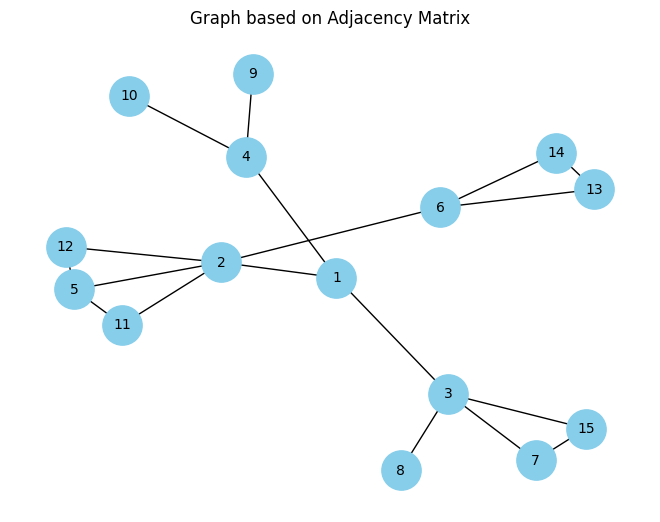

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the adjacency matrix
adj_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
num_nodes = len(adj_matrix)
for i in range(1, num_nodes + 1):
    G.add_node(i)

# Add edges based on the adjacency matrix
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        if adj_matrix[i][j]:
            G.add_edge(i+1, j+1)

# Draw the graph
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=800, font_size=10)
plt.title('Graph based on Adjacency Matrix')
plt.show()


In [ ]:
from collections import deque

def shortest_path(adj_matrix, start_node, end_node):
    # Create a queue for BFS and mark all nodes as not visited
    queue = deque()
    visited = [False] * len(adj_matrix)

    # Mark the start node as visited and enqueue it
    visited[start_node - 1] = True
    queue.append(start_node)

    # Keep track of the parent node to reconstruct the path
    parent = [-1] * len(adj_matrix)

    # BFS traversal
    while queue:
        # Dequeue a node from the queue
        current_node = queue.popleft()

        # Check if the current node is the destination
        if current_node == end_node:
            # Reconstruct the path from end_node to start_node
            path = []
            while current_node != -1:
                path.append(current_node)
                current_node = parent[current_node - 1]
            return path[::-1]  # Reverse the path to get start to end

        # Visit all adjacent nodes of the current node
        for neighbor, connected in enumerate(adj_matrix[current_node - 1]):
            if connected and not visited[neighbor]:
                visited[neighbor] = True
                parent[neighbor] = current_node
                queue.append(neighbor + 1)  # Adjust index to node number

    # If no path found
    return None

# Test the algorithm with your adjacency matrix
adj_matrix = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
]

# Map node numbers to their positions on the grid
node_positions = {
    1: (1, 4),  2: (2, 4),  3: (3, 4),
    4: (1, 3),  5: (3, 3),  6: (4, 3),
    7: (1, 2),  8: (2, 2),  9: (3, 2),
    10: (4, 2), 11: (2, 1), 12: (3, 1),
    13: (1, 0), 14: (2, 0), 15: (3, 0)
}

start = 1
end = 15
path = shortest_path(adj_matrix, start, end)

if path:
    print("Shortest path from", start, "to", end, ":", path)
    print("Path positions on the grid:", [node_positions[node] for node in path])
else:
    print("No path found from", start, "to", end)


Shortest path from 1 to 15 : [1, 3, 15]
Path positions on the grid: [(1, 4), (3, 4), (3, 0)]


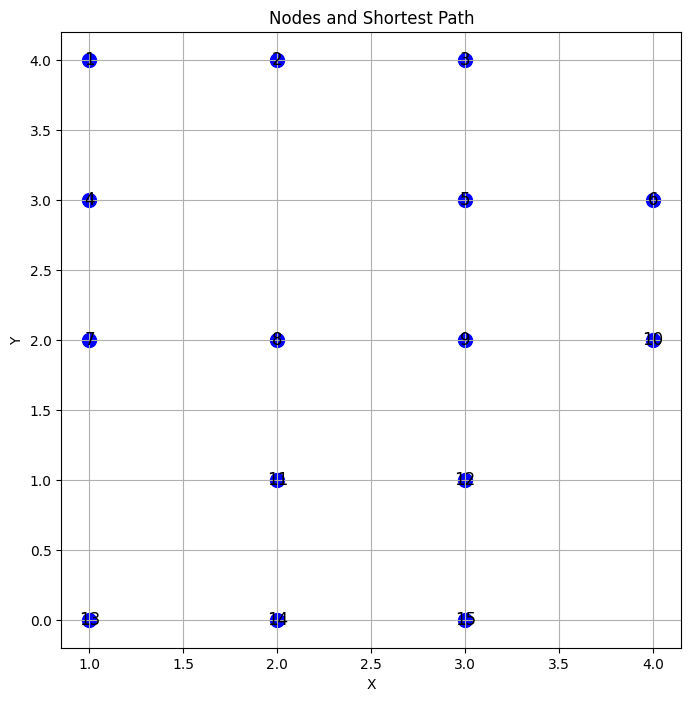

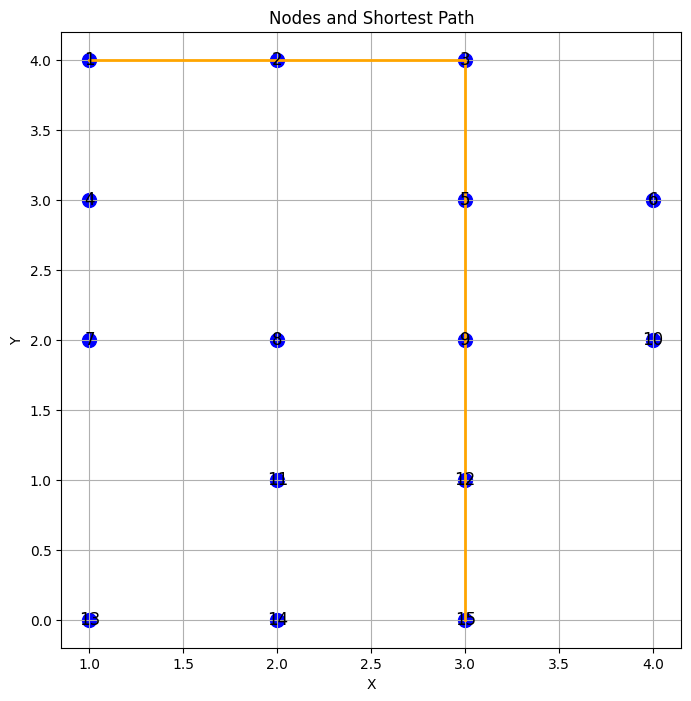

In [ ]:
import matplotlib.pyplot as plt

# Map node numbers to their positions on the grid
node_positions = {
    1: (1, 4),  2: (2, 4),  3: (3, 4),
    4: (1, 3),  5: (3, 3),  6: (4, 3),
    7: (1, 2),  8: (2, 2),  9: (3, 2),
    10: (4, 2), 11: (2, 1), 12: (3, 1),
    13: (1, 0), 14: (2, 0), 15: (3, 0)
}

# Function to plot nodes and path
def plot_graph(node_positions, path=None):
    # Extract x and y coordinates from node positions
    x_values = [pos[0] for pos in node_positions.values()]
    y_values = [pos[1] for pos in node_positions.values()]

    # Plot nodes
    plt.figure(figsize=(8, 8))  # Adjust figure size if needed
    plt.scatter(x_values, y_values, color='blue', s=100)  # Adjust size of nodes if needed

    # Plot node names
    for node, (x, y) in node_positions.items():
        plt.text(x, y, str(node), fontsize=12, ha='center', va='center')

    # Plot path
    if path:
        path_x = [node_positions[node][0] for node in path]
        path_y = [node_positions[node][1] for node in path]
        plt.plot(path_x, path_y, color='orange', linewidth=2)

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Nodes and Shortest Path')
    plt.grid(True)
    plt.show()

# Test plot without path
plot_graph(node_positions)

# Test plot with path
if path:
    plot_graph(node_positions, path)
